## Main notebook for EDA Assignment
#### Make sure to go through the steps in the `data/README.md` file
#### To ensure you have your project setup correctly before using this file

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
%matplotlib inline
print("Setup Complete")

Setup Complete


In [19]:
# Combine season 2000 - 2018 data exclude 2019-20 and 2020-21
# Load the data
season_2000_01 = pd.read_csv('data/Datasets/2000-01.csv')
season_2001_02 = pd.read_csv('data/Datasets/2001-02.csv')
season_2002_03 = pd.read_csv('data/Datasets/2002-03.csv')
season_2003_04 = pd.read_csv('data/Datasets/2003-04.csv')
season_2004_05 = pd.read_csv('data/Datasets/2004-05.csv')
season_2005_06 = pd.read_csv('data/Datasets/2005-06.csv')
season_2006_07 = pd.read_csv('data/Datasets/2006-07.csv')
season_2007_08 = pd.read_csv('data/Datasets/2007-08.csv')
season_2008_09 = pd.read_csv('data/Datasets/2008-09.csv')
season_2009_10 = pd.read_csv('data/Datasets/2009-10.csv')
season_2010_11 = pd.read_csv('data/Datasets/2010-11.csv')
season_2011_12 = pd.read_csv('data/Datasets/2011-12.csv')
season_2012_13 = pd.read_csv('data/Datasets/2012-13.csv')
season_2013_14 = pd.read_csv('data/Datasets/2013-14.csv')
season_2014_15 = pd.read_csv('data/Datasets/2014-15.csv')
season_2015_16 = pd.read_csv('data/Datasets/2015-16.csv')
season_2016_17 = pd.read_csv('data/Datasets/2016-17.csv')
season_2017_18 = pd.read_csv('data/Datasets/2017-18.csv')
# NOTE: We are excluding 2018-19 and 2019-20 season data as it is incomplete
season_2020_21 = pd.read_csv('data/2020-2021.csv')
season_2021_22 = pd.read_csv('data/2021-2022.csv')

In [20]:
# Required columns
columns = ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR',
           'Referee', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR']

# Combine all the dataframes into one with the required columns
seasons = [season_2000_01, season_2001_02, season_2002_03, season_2003_04, season_2004_05, season_2005_06,
           season_2006_07, season_2007_08, season_2008_09, season_2009_10, season_2010_11, season_2011_12,
           season_2012_13, season_2013_14, season_2014_15, season_2015_16, season_2016_17, season_2017_18]

# Combine all the dataframes into one with the required columns
results_data = pd.concat([df[columns] for df in seasons], ignore_index=True)

# Change the Date column to datetime format
results_data['Date'] = pd.to_datetime(results_data['Date'], format='mixed', dayfirst=True)

# Save the combined dataframe to a csv file
results_data.to_csv('data/all_match_results.csv', index=False)

# Display the first 5 rows of the combined dataframe
results_data.head()


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,2000-08-19,Charlton,Man City,4,0,H,2,0,H,Rob Harris,...,14,4,6,6,13,12,1,2,0,0
1,2000-08-19,Chelsea,West Ham,4,2,H,1,0,H,Graham Barber,...,10,5,7,7,19,14,1,2,0,0
2,2000-08-19,Coventry,Middlesbrough,1,3,A,1,1,D,Barry Knight,...,3,9,8,4,15,21,5,3,1,0
3,2000-08-19,Derby,Southampton,2,2,D,1,2,A,Andy D'Urso,...,4,6,5,8,11,13,1,1,0,0
4,2000-08-19,Leeds,Everton,2,0,H,2,0,H,Dermot Gallagher,...,8,6,6,4,21,20,1,3,0,0


In [21]:
# Load the combined match results data
results_data = pd.read_csv('data/all_match_results.csv')

# 1. Top Scoring Teams
# Please include the number of games played by each team
home_goals = results_data.groupby('HomeTeam')['FTHG'].sum()
away_goals = results_data.groupby('AwayTeam')['FTAG'].sum()
total_goals = home_goals + away_goals

# Calculate the number of games played by each team
home_games = results_data['HomeTeam'].value_counts()
away_games = results_data['AwayTeam'].value_counts()
total_games = home_games.add(away_games, fill_value=0)

# Combine goals and games played into a DataFrame
top_scoring_teams = pd.DataFrame({'Goals': total_goals, 'Games': total_games})

# Sort by goals scored
top_scoring_teams = top_scoring_teams.sort_values(by='Goals', ascending=False).head(30)

print("Top Scoring Teams:\n", top_scoring_teams)

Top Scoring Teams:
                 Goals  Games
Arsenal          1316    684
Man United       1301    684
Chelsea          1272    684
Liverpool        1180    684
Man City         1099    646
Tottenham        1058    684
Everton           914    684
Newcastle         773    608
Aston Villa       718    608
West Ham          685    570
Fulham            570    494
Sunderland        520    532
Blackburn         518    418
Southampton       512    418
Bolton            495    418
West Brom         475    456
Stoke             398    380
Middlesbrough     366    342
Leicester         335    266
Wigan             316    304
Swansea           306    266
Charlton          301    266
Portsmouth        292    266
Birmingham        273    266
Crystal Palace    255    228
Leeds             215    152
Norwich           202    190
Hull              181    190
Wolves            156    152
Watford           153    152


In [22]:
# 2. Home vs Away Performance
home_performance = results_data.groupby('HomeTeam')['FTHG'].sum()
away_performance = results_data.groupby('AwayTeam')['FTAG'].sum()
performance_comparison = pd.DataFrame({'Home': home_performance, 'Away': away_performance}).fillna(0)
performance_comparison['Total'] = performance_comparison['Home'] + performance_comparison['Away']
performance_comparison = performance_comparison.sort_values(by='Total', ascending=False).head(10)
print("Home vs Away Performance:\n", performance_comparison)

Home vs Away Performance:
              Home  Away  Total
Arsenal       755   561   1316
Man United    731   570   1301
Chelsea       735   537   1272
Liverpool     661   519   1180
Man City      630   469   1099
Tottenham     615   443   1058
Everton       551   363    914
Newcastle     456   317    773
Aston Villa   377   341    718
West Ham      393   292    685


In [23]:
# 2a. What teams score the most goals at home?
home_performance = results_data.groupby('HomeTeam')['FTHG'].sum()
home_performance = home_performance.sort_values(ascending=False).head(10)
print("Teams that score the most goals at home:\n", home_performance)

# 2b. What teams score the most goals away?
away_performance = results_data.groupby('AwayTeam')['FTAG'].sum()
away_performance = away_performance.sort_values(ascending=False).head(10)
print("Teams that score the most goals away:\n", away_performance)


Teams that score the most goals at home:
 HomeTeam
Arsenal        755
Chelsea        735
Man United     731
Liverpool      661
Man City       630
Tottenham      615
Everton        551
Newcastle      456
West Ham       393
Aston Villa    377
Name: FTHG, dtype: int64
Teams that score the most goals away:
 AwayTeam
Man United     570
Arsenal        561
Chelsea        537
Liverpool      519
Man City       469
Tottenham      443
Everton        363
Aston Villa    341
Newcastle      317
West Ham       292
Name: FTAG, dtype: int64


In [24]:
# 3. Most Frequent Match Outcomes
match_outcomes = results_data['FTR'].value_counts()
print("Most Frequent Match Outcomes:\n", match_outcomes)

Most Frequent Match Outcomes:
 FTR
H    3176
A    1913
D    1751
Name: count, dtype: int64


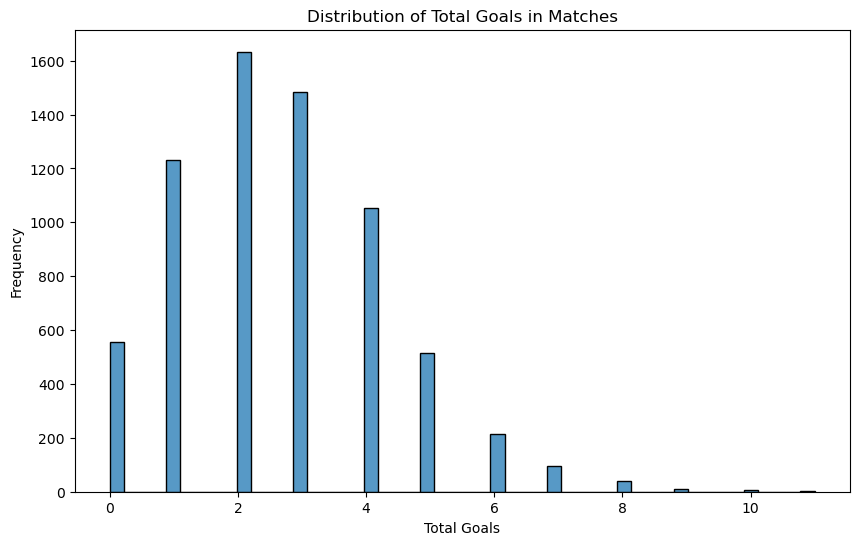

In [25]:
# 4. Goals Distribution
plt.figure(figsize=(10, 6))
sns.histplot(results_data['FTHG'] + results_data['FTAG'], bins=50)
plt.title('Distribution of Total Goals in Matches')
plt.xlabel('Total Goals')
plt.ylabel('Frequency')
plt.show()

Number of games each referee has officiated:
 Referee
M. A. Riley            2
A. P. D'Urso           2
Mn Atkinson            2
P. Jones               2
B. Knight              2
D. R. Elleray          2
S. W. Dunn             2
S Hooper               2
P Crossley             2
J. T. Winter           1
D Gallaghe             1
St Bennett             1
D Gallagh              1
E. K. Wolstenholme     1
Yates, N               1
C. R. Wilkes           1
Steve Bennett          1
B. Knight              1
Mark Halsey            1
Andy D'Urso            1
Roy Burton             1
Ian Harris             1
F Taylor               1
Andy Hall              1
l Mason                1
A. G. Wiley            1
ﾠA Wiley               1
I Williamson           1
G. Poll                1
Durkin, P.             1
Styles, R              1
C. J. Foy              1
P. Dowd                1
M. D. Messias          1
J.T. Winter            1
M. L. Dean             1
A.G. Wiley             1
P.A. Durkin          

/opt/miniconda3/envs/EDA/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65440 (\N{HALFWIDTH HANGUL FILLER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


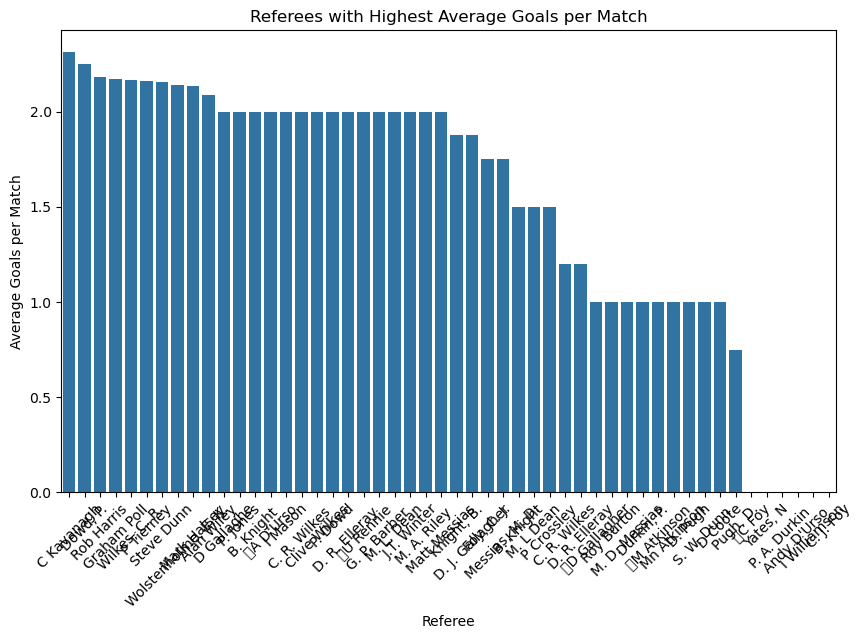

In [62]:
# 5. Referee Influence

# Number of games each referee has officiated
referee_games = results_data['Referee'].value_counts().tail(50)
print("Number of games each referee has officiated:\n", referee_games)

referee_goals = results_data.groupby('Referee')[['FTHG', 'FTAG']].mean().sum(axis=1).sort_values(ascending=False).tail(50)
print("Referees with Highest Average Goals per Match:\n", referee_goals)

# Plot all the referees with their average goals per match
plt.figure(figsize=(10, 6))
sns.barplot(x=referee_goals.index, y=referee_goals)
plt.title('Referees with Highest Average Goals per Match')
plt.xlabel('Referee')
plt.ylabel('Average Goals per Match')
plt.xticks(rotation=45)
plt.show()


/var/folders/lw/6p1r6xmj4qzcts8dvyg4vmqr0000gn/T/ipykernel_29639/2485407760.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Season', y='Goals', data=season_goals, palette='viridis')


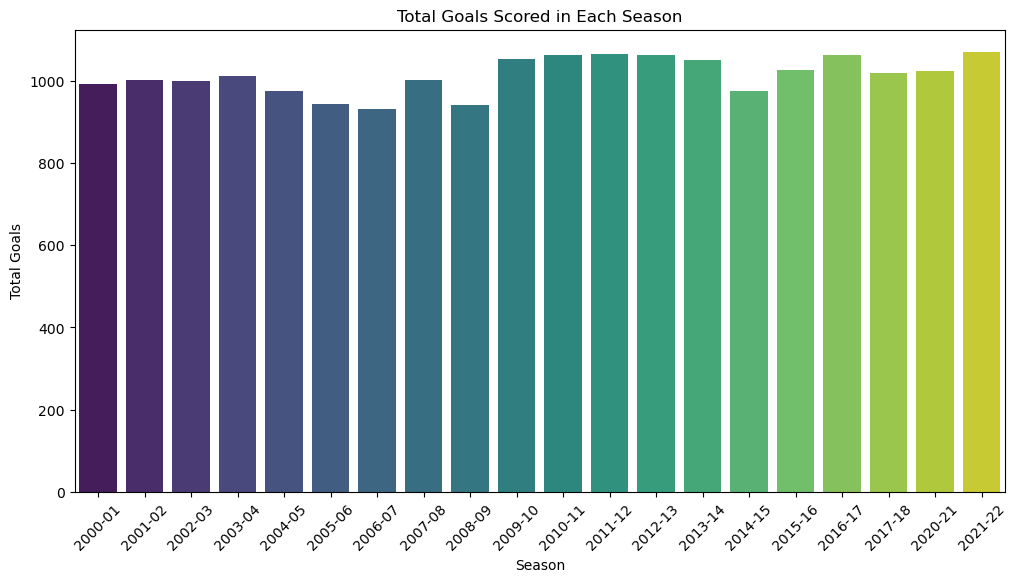

In [27]:
# 6. Goals scored in each season 
# Calculate the total goals scored in each season
season_2000_01_goals = season_2000_01['FTHG'].sum() + season_2000_01['FTAG'].sum()
season_2001_02_goals = season_2001_02['FTHG'].sum() + season_2001_02['FTAG'].sum()
season_2002_03_goals = season_2002_03['FTHG'].sum() + season_2002_03['FTAG'].sum()
season_2003_04_goals = season_2003_04['FTHG'].sum() + season_2003_04['FTAG'].sum()
season_2004_05_goals = season_2004_05['FTHG'].sum() + season_2004_05['FTAG'].sum()
season_2005_06_goals = season_2005_06['FTHG'].sum() + season_2005_06['FTAG'].sum()
season_2006_07_goals = season_2006_07['FTHG'].sum() + season_2006_07['FTAG'].sum()
season_2007_08_goals = season_2007_08['FTHG'].sum() + season_2007_08['FTAG'].sum()
season_2008_09_goals = season_2008_09['FTHG'].sum() + season_2008_09['FTAG'].sum()
season_2009_10_goals = season_2009_10['FTHG'].sum() + season_2009_10['FTAG'].sum()
season_2010_11_goals = season_2010_11['FTHG'].sum() + season_2010_11['FTAG'].sum()
season_2011_12_goals = season_2011_12['FTHG'].sum() + season_2011_12['FTAG'].sum()
season_2012_13_goals = season_2012_13['FTHG'].sum() + season_2012_13['FTAG'].sum()
season_2013_14_goals = season_2013_14['FTHG'].sum() + season_2013_14['FTAG'].sum()
season_2014_15_goals = season_2014_15['FTHG'].sum() + season_2014_15['FTAG'].sum()
season_2015_16_goals = season_2015_16['FTHG'].sum() + season_2015_16['FTAG'].sum()
season_2016_17_goals = season_2016_17['FTHG'].sum() + season_2016_17['FTAG'].sum()
season_2017_18_goals = season_2017_18['FTHG'].sum() + season_2017_18['FTAG'].sum()
season_2020_21_goals = season_2020_21['FTHG'].sum() + season_2020_21['FTAG'].sum()
season_2021_22_goals = season_2021_22['FTHG'].sum() + season_2021_22['FTAG'].sum()

# Create a DataFrame with the total goals scored in each season
season_goals = pd.DataFrame({'Season': ['2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06', '2006-07',
                                        '2007-08', '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14',
                                        '2014-15', '2015-16', '2016-17', '2017-18', '2020-21', '2021-22'],
                             'Goals': [season_2000_01_goals, season_2001_02_goals, season_2002_03_goals,
                                       season_2003_04_goals, season_2004_05_goals, season_2005_06_goals,
                                       season_2006_07_goals, season_2007_08_goals, season_2008_09_goals,
                                       season_2009_10_goals, season_2010_11_goals, season_2011_12_goals,
                                       season_2012_13_goals, season_2013_14_goals, season_2014_15_goals,
                                       season_2015_16_goals, season_2016_17_goals, season_2017_18_goals,
                                       season_2020_21_goals, season_2021_22_goals]})

# Plot the total goals scored in each season
plt.figure(figsize=(12, 6))
sns.barplot(x='Season', y='Goals', data=season_goals, palette='viridis')
plt.title('Total Goals Scored in Each Season')
plt.xlabel('Season')
plt.ylabel('Total Goals')
plt.xticks(rotation=45)
plt.show()


In [28]:
def head_to_head_analysis(team1, team2, results_data):
    head_to_head = results_data[((results_data['HomeTeam'] == team1) & (results_data['AwayTeam'] == team2)) |
                                ((results_data['HomeTeam'] == team2) & (results_data['AwayTeam'] == team1))]

    team1_goals = head_to_head[head_to_head['HomeTeam'] == team1]['FTHG'].sum() + head_to_head[head_to_head['AwayTeam'] == team1]['FTAG'].sum()
    team2_goals = head_to_head[head_to_head['HomeTeam'] == team2]['FTHG'].sum() + head_to_head[head_to_head['AwayTeam'] == team2]['FTAG'].sum()
    team1_wins = head_to_head[(head_to_head['HomeTeam'] == team1) & (head_to_head['FTR'] == 'H')].shape[0] + head_to_head[(head_to_head['AwayTeam'] == team1) & (head_to_head['FTR'] == 'A')].shape[0]
    team2_wins = head_to_head[(head_to_head['HomeTeam'] == team2) & (head_to_head['FTR'] == 'H')].shape[0] + head_to_head[(head_to_head['AwayTeam'] == team2) & (head_to_head['FTR'] == 'A')].shape[0]
    draws = head_to_head[head_to_head['FTR'] == 'D'].shape[0]

    print(f"Head-to-Head Results between {team1} and {team2}:\n")
    print(f"Total Goals Scored by {team1}: {team1_goals}")
    print(f"Total Goals Scored by {team2}: {team2_goals}")
    print(f"Total Wins for {team1}: {team1_wins}")
    print(f"Total Wins for {team2}: {team2_wins}")
    print(f"Total Draws: {draws}")
    print(f"Head-to-Head Results between {team1} and {team2}:\n", head_to_head[['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR']])

# Call the function with the specified teams
head_to_head_analysis('Man United', 'Man City', results_data)
head_to_head_analysis('Tottenham', 'Arsenal', results_data)
head_to_head_analysis('Liverpool', 'Man United', results_data)


Head-to-Head Results between Man United and Man City:

Total Goals Scored by Man United: 43
Total Goals Scored by Man City: 49
Total Wins for Man United: 14
Total Wins for Man City: 13
Total Draws: 7
Head-to-Head Results between Man United and Man City:
             Date    HomeTeam    AwayTeam  FTHG  FTAG FTR
133   2000-11-18    Man City  Man United     0     1   A
340   2001-04-21  Man United    Man City     1     1   D
884   2002-11-09    Man City  Man United     3     1   H
1026  2003-02-09  Man United    Man City     1     1   D
1293  2003-12-13  Man United    Man City     3     1   H
1415  2004-03-14    Man City  Man United     4     1   H
1636  2004-11-07  Man United    Man City     0     0   D
1785  2005-02-13    Man City  Man United     0     2   A
1939  2005-09-10  Man United    Man City     1     1   D
2110  2006-01-14    Man City  Man United     3     1   H
2440  2006-12-09  Man United    Man City     3     1   H
2641  2007-05-05    Man City  Man United     0     1   A
2686

In [ ]:
# Load the data
df = pd.read_csv('data/all_match_results.csv')

# Get a list of the columns we want to do a correlation analysis on
card_columns = ['HY', 'AY', 'HR', 'AR', 'FTR']

# Create a mapping for the FTR column
result_mapping = {'H': 1, 'D': 0, 'A': -1}

# Apply the mapping to the FTR column
df['FTR'] = df['FTR'].map(result_mapping)

# Calculate the correlation matrix
correlation_matrix = df[card_columns].corr()

# Format the values in the correlation matrix to 4 decimal places
correlation_matrix = correlation_matrix.round(4)

# Display the correlation matrix
correlation_matrix

# # Plot the correlation matrix
# plt.figure(figsize=(10, 6))
# sns.heatmap(correlation_matrix, annot=True, cmap='flare', linewidths=0.5)
# plt.title('Correlation Matrix of Card Statistics')
# plt.show()


,HY,AY,HR,AR,FTR
HY,1.0000,0.1928,0.0835,0.0428,-0.1333
AY,0.1928,1.0000,0.0835,0.1040,0.0275
HR,0.0835,0.0835,1.0000,0.0741,-0.1355
AR,0.0428,0.1040,0.0741,1.0000,0.0943
FTR,-0.1333,0.0275,-0.1355,0.0943,1.0000




1. **Home Advantage Analysis**:
    - Do teams generally perform better at home compared to away? Calculate the win percentage for home and away games.

2. **Goal Scoring Patterns**:
    - Which team has the highest average goals per match? 
    - Are there any significant differences in the number of goals scored in the first half versus the second half?

3. **Referee Influence**:
    - Which referees tend to officiate matches with the highest average number of goals?
    - Is there a correlation between the number of yellow/red cards given by a referee and the match outcome?

4. **Seasonal Trends**:
    - How do the total number of goals scored in a season change over the years?
    - Are there any noticeable trends in the number of yellow and red cards issued over the seasons?

5. **Team Performance Over Time**:
    - How has the performance of top teams (e.g., Man United, Liverpool) changed over the years? 
    - Which team has shown the most improvement or decline over the seasons?

6. **Impact of Early Goals**:
    - How often does the team that scores the first goal go on to win the match?
    - What is the average time of the first goal in matches that end in a win versus those that end in a draw or loss?

7. **Head-to-Head Analysis**:
    - What are the win/loss/draw statistics for major rivalries (e.g., Man United vs. Liverpool)?
    - How do these statistics change when the match is played at home versus away?

8. **Disciplinary Actions**:
    - Do teams with more yellow/red cards tend to lose more matches?
    - Is there a significant difference in the number of cards received by home teams versus away teams?

9. **Goal Distribution**:
    - What is the distribution of total goals scored in a match? Are high-scoring matches (e.g., more than 4 goals) common?
    - Which teams are involved in the highest number of high-scoring matches?

10. **Match Outcome Prediction**:
     - Can we build a predictive model to determine the outcome of a match based on historical data? What features (e.g., home/away, referee, team form) are most predictive?



Home Win Rate: 46.43%
Away Win Rate: 27.97%
Draw Rate: 25.60%


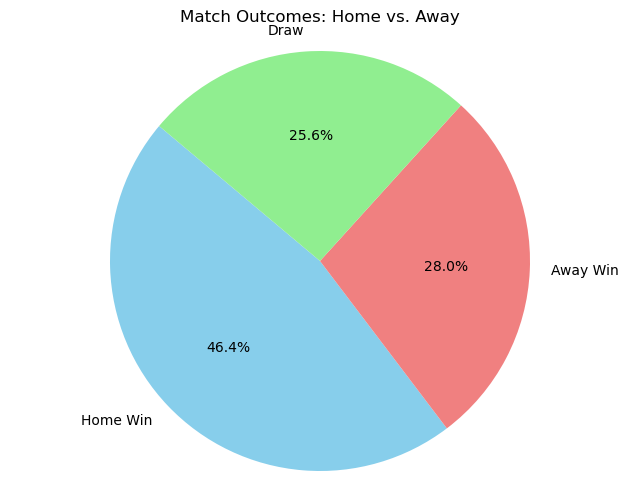

Teams with Highest Average Goals per Match:
 HomeTeam
Blackpool      3.526316
Bournemouth    3.105263
Arsenal        3.052632
Middlesboro    3.000000
Chelsea        2.938596
Man City       2.900929
Cardiff        2.894737
Leeds          2.842105
Tottenham      2.830409
Wolves         2.828947
dtype: float64

Average Goals per Match (First Half vs. Second Half):
 HTHG    0.601251
HTAG    0.546338
FTHG    1.372514
FTAG    1.252757
dtype: float64

Number of Games Played by Each Team:
 Arsenal             684
Aston Villa         608
Birmingham          266
Blackburn           418
Blackpool            38
Bolton              418
Bournemouth         114
Bradford             38
Brighton             38
Burnley             152
Cardiff              38
Charlton            266
Chelsea             684
Coventry             38
Crystal Palace      228
Derby               114
Everton             684
Fulham              494
Huddersfield         38
Hull                190
Ipswich              76
Leeds    

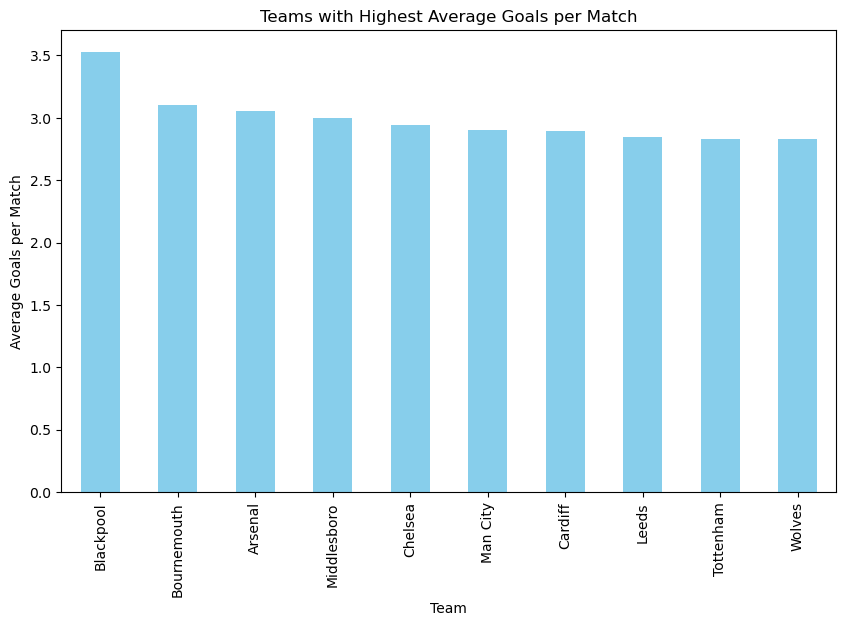

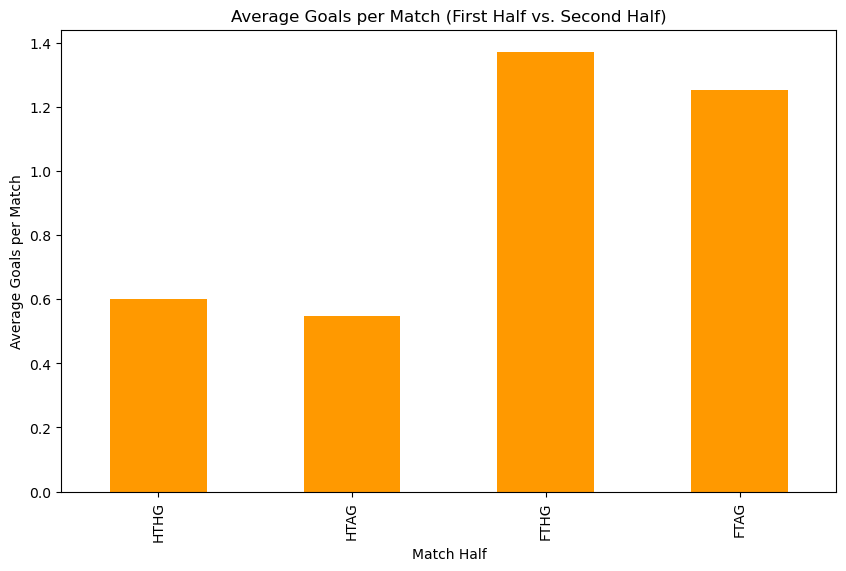

In [63]:
# 10. Home Advantage Analysis
# Does playing at home provide an advantage to the home team?
# Calculate the win rate for home and away teams
home_win_rate = (results_data[results_data['FTR'] == 'H'].shape[0] / results_data.shape[0]) * 100
away_win_rate = (results_data[results_data['FTR'] == 'A'].shape[0] / results_data.shape[0]) * 100

# Calculate the draw rate
draw_rate = (results_data[results_data['FTR'] == 'D'].shape[0] / results_data.shape[0]) * 100

# Display the win rates
print(f"Home Win Rate: {home_win_rate:.2f}%")
print(f"Away Win Rate: {away_win_rate:.2f}%")
print(f"Draw Rate: {draw_rate:.2f}%")

# Plot the win rates
plt.figure(figsize=(8, 6))
win_rates = [home_win_rate, away_win_rate, draw_rate]
labels = ['Home Win', 'Away Win', 'Draw']
plt.pie(win_rates, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.axis('equal')
plt.title('Match Outcomes: Home vs. Away')
plt.show()

# 11. Average Goals per Match
# Which teams have the highest average goals per match
# Are there any significant differences in the average goals scored in the first half vs. second half?

# Calculate the number of games each team has played
home_games = results_data['HomeTeam'].value_counts()
away_games = results_data['AwayTeam'].value_counts()
total_games = home_games + away_games

# Calculate the average goals per match for each team
average_goals = results_data.groupby('HomeTeam')[['FTHG', 'FTAG']].mean().sum(axis=1)
average_goals = average_goals.sort_values(ascending=False).head(10)
print("Teams with Highest Average Goals per Match:\n", average_goals)

# Calculate the average goals scored in the first half and second half
average_goals_half = results_data.groupby('HomeTeam')[['HTHG', 'HTAG', 'FTHG', 'FTAG']].mean()
average_goals_half = average_goals_half[['HTHG', 'HTAG', 'FTHG', 'FTAG']].mean()
print("\nAverage Goals per Match (First Half vs. Second Half):\n", average_goals_half)

# Display the number of games each team has played
print("\nNumber of Games Played by Each Team:\n", total_games)

# Plot the average goals per match
plt.figure(figsize=(10, 6))
average_goals.plot(kind='bar', color='skyblue')
plt.title('Teams with Highest Average Goals per Match')
plt.xlabel('Team')
plt.ylabel('Average Goals per Match')
plt.show()

# Plot the average goals scored in the first half and second half
plt.figure(figsize=(10, 6))
average_goals_half.plot(kind='bar', color='#FF9900')
plt.title('Average Goals per Match (First Half vs. Second Half)')
plt.xlabel('Match Half')
plt.ylabel('Average Goals per Match')
plt.show()



Correlation between Shots on Target and Goals Scored:
           HST       AST      FTHG      FTAG
HST   1.000000 -0.041027  0.408358 -0.100387
AST  -0.041027  1.000000 -0.091683  0.429639
FTHG  0.408358 -0.091683  1.000000 -0.055298
FTAG -0.100387  0.429639 -0.055298  1.000000


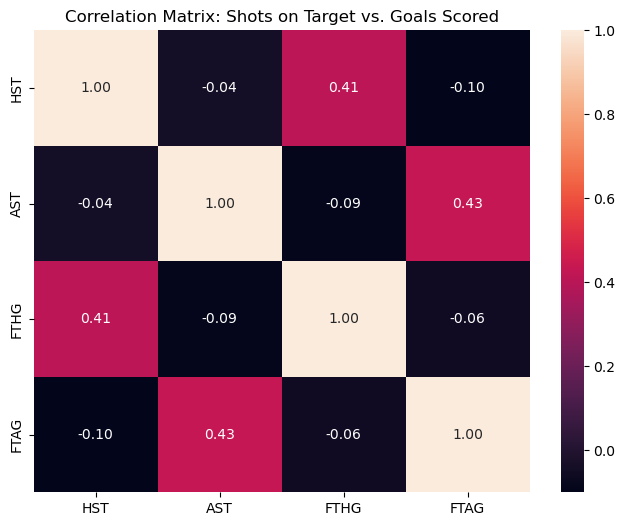

In [45]:
# Find a correlatin between shots on target on goals scored in a match
# Calculate the correlation between shots on target and goals scored
shots_on_target_correlation = results_data[['HST', 'AST', 'FTHG', 'FTAG']].copy()

# Calculate the correlation matrix
correlation_matrix = shots_on_target_correlation.corr()

# Display the correlation matrix
print("Correlation between Shots on Target and Goals Scored:")
print(correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix: Shots on Target vs. Goals Scored')
plt.show()



In [54]:
# Calculate the ratio of shots on target to goals scored for each team
# Remove rows where the number of goals scored is 0 to avoid division by zero
shots_on_target_ratio = results_data[(results_data['FTHG'] > 0) & (results_data['FTAG'] > 0)]
shots_on_target_ratio = shots_on_target_ratio.groupby('HomeTeam')[['HST', 'AST', 'FTHG', 'FTAG']].sum()
shots_on_target_ratio['HomeRatio'] = shots_on_target_ratio['HST'] / shots_on_target_ratio['FTHG']
shots_on_target_ratio['AwayRatio'] = shots_on_target_ratio['AST'] / shots_on_target_ratio['FTAG']
shots_on_target_ratio['TotalGoals'] = shots_on_target_ratio['FTHG'] + shots_on_target_ratio['FTAG']
shots_on_target_ratio['TotalShotsOnTarget'] = shots_on_target_ratio['HST'] + shots_on_target_ratio['AST']
shots_on_target_ratio = shots_on_target_ratio[['HomeRatio', 'AwayRatio', 'TotalGoals', 'TotalShotsOnTarget']].mean(axis=1)
shots_on_target_ratio = shots_on_target_ratio.sort_values(ascending=True).head(20)
print("Teams with Lowest Ratio of Shots on Target to Goals Scored:\n", shots_on_target_ratio)




Teams with Lowest Ratio of Shots on Target to Goals Scored:
 HomeTeam
Huddersfield         19.807692
Coventry             27.700000
Brighton             35.044818
Cardiff              37.176901
Bradford             39.417017
Sheffield United     42.588235
Middlesboro          47.402961
Ipswich              69.133461
Blackpool            87.303153
Derby               103.230854
Reading             113.188846
Bournemouth         117.734623
QPR                 131.310636
Watford             133.283626
Burnley             138.910821
Crystal Palace      166.101202
Leeds               169.841211
Hull                176.676409
Wolves              184.771190
Norwich             228.187640
dtype: float64


Teams with Lowest Average Shots on Target per Goal Scored:
 HomeTeam
Coventry      5.405405
QPR           5.291971
Bolton        5.163569
Portsmouth    5.072886
Wolves        4.841860
Wigan         4.809896
Blackburn     4.795455
Sunderland    4.788462
Birmingham    4.758278
Bradford      4.693878
Name: Average Shots on Target per Goal, dtype: float64


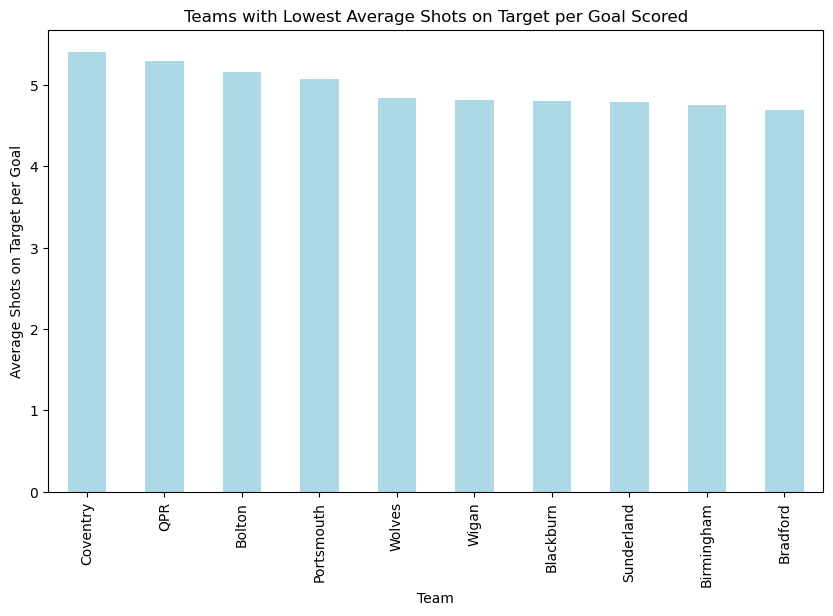

In [48]:
# Teams with the lowest average shots on target per goal scored
average_shots_on_target_team_lowest = average_shots_on_target_team.sort_values(ascending=False).head(10)
print("Teams with Lowest Average Shots on Target per Goal Scored:\n", average_shots_on_target_team_lowest)

# Plot the average shots on target per goal scored for each team
plt.figure(figsize=(10, 6))
average_shots_on_target_team_lowest.plot(kind='bar', color='lightblue')
plt.title('Teams with Lowest Average Shots on Target per Goal Scored')
plt.xlabel('Team')
plt.ylabel('Average Shots on Target per Goal')
plt.show()


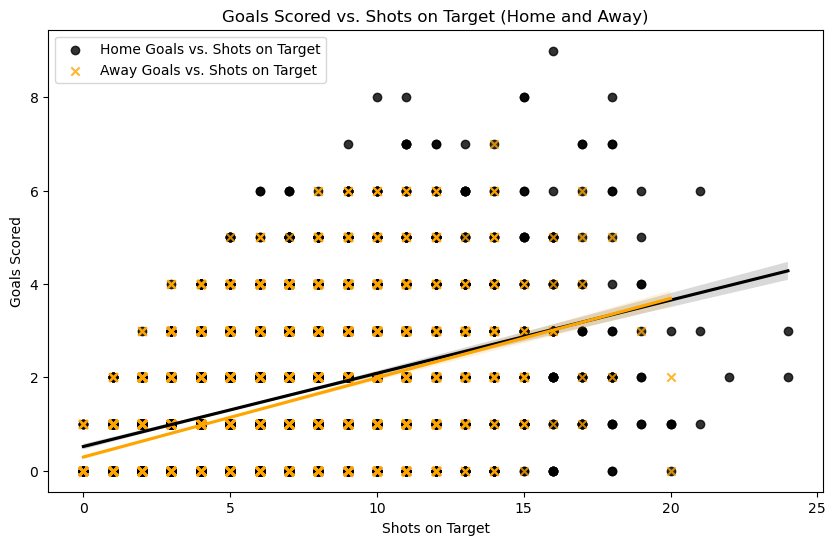

In [92]:
# Load the data
df = pd.read_csv('data/all_match_results.csv')

import matplotlib.pyplot as plt
import seaborn as sns

# Sample Data
# Replace with your actual data
home_goals = df['FTHG']  # Home goals scored
home_shots = df['HST']   # Home shots on target
away_goals = df['FTAG']  # Away goals scored
away_shots = df['AST']   # Away shots on target

# Plotting
plt.figure(figsize=(10, 6))

# Home goals vs. Home shots on target
sns.regplot(x=home_shots, y=home_goals, label='Home Goals vs. Shots on Target', scatter=True, color='black', marker='o')

# Away goals vs. Away shots on target
sns.regplot(x=away_shots, y=away_goals, label='Away Goals vs. Shots on Target', scatter=True, color='orange', marker='x')

# Customize plot
plt.xlabel('Shots on Target')
plt.ylabel('Goals Scored')
plt.title('Goals Scored vs. Shots on Target (Home and Away)')
plt.legend()
plt.show()


In [88]:
# Create a correlation matrix for the shots on target and goals scored
shots_goals_correlation = df[['HST', 'AST', 'FTHG', 'FTAG']].copy()
correlation_matrix = shots_goals_correlation.corr()

# Display the correlation matrix
correlation_matrix

,HST,AST,FTHG,FTAG
HST,1.000000,-0.041027,0.408358,-0.100387
AST,-0.041027,1.000000,-0.091683,0.429639
FTHG,0.408358,-0.091683,1.000000,-0.055298
FTAG,-0.100387,0.429639,-0.055298,1.000000


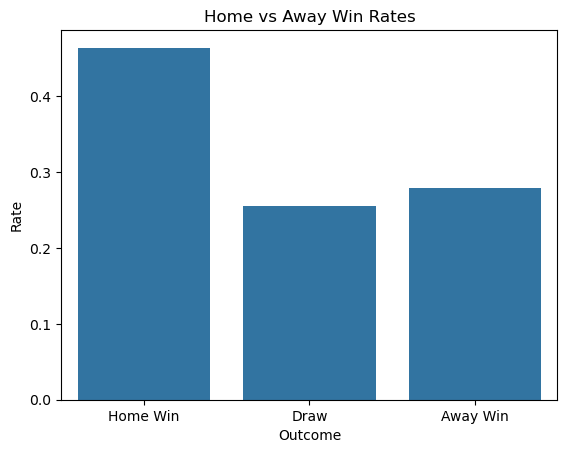

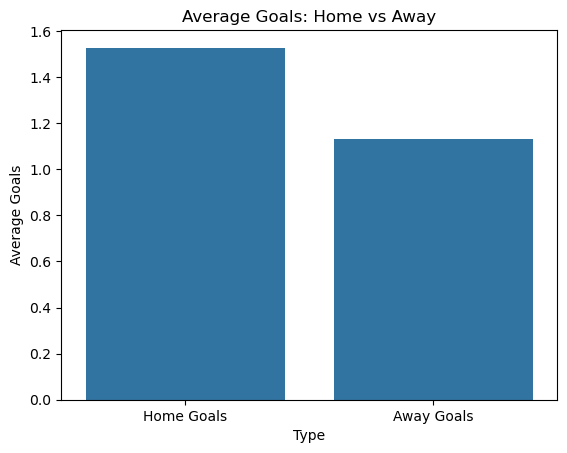

Percentage of Home Wins: 46.43%


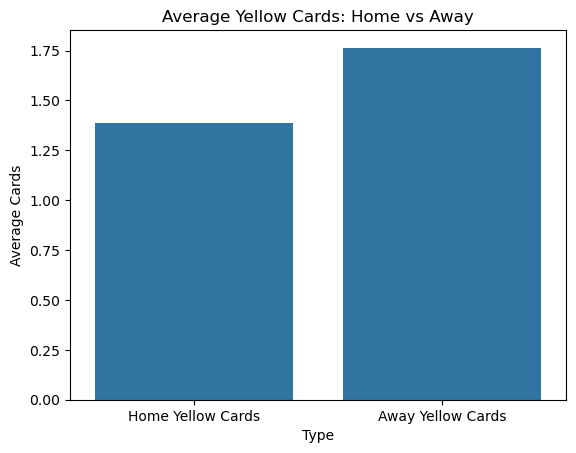

T-test for Goals (Home vs Away): t-stat = 19.129668098831047, p-value = 1.6047741905031723e-80
Chi-square test: chi2 = 2299.452657699173, p-value = 0.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                HomeWin   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     3227.
Date:                Thu, 31 Oct 2024   Prob (F-statistic):               0.00
Time:                        19:18:06   Log-Likelihood:                -3938.4
No. Observations:                6840   AIC:                             7891.
Df Residuals:                    6833   BIC:                             7939.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0865      0.018      4.845      0.000       0.051       0.121
FTHG           0.3854      0.004     87.183      0.000       0.377       0.394
FTAG          -0.4529      0.005    -87.597      0.000      -0.463      -0.443
HST           -0.0028      0.002     -1.657      0.098      -0.006       0.001
AST            0.0058      0.002      2.858      0.004       0.002       0.010
HY             0.0002      0.005      0.038      0.970      -0.009       0.009
AY             0.0061      0.004      1.461      0.144      -0.002       0.014
==============================================================================
Omnibus:                       61.349   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.787
Skew:                          -0.232   Prob(JB):                     2.32e-14
Kurtosis:                       3.076   Cond. No.                         31.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency

# Load your dataset
# Replace 'your_data.csv' with the actual filename and ensure your columns match your dataset
df = pd.read_csv('data/all_match_results.csv')

# Example columns assumed in the dataset:
# 'FTR' = Full Time Result (H: Home Win, D: Draw, A: Away Win)
# 'FTHG' = Full Time Home Goals
# 'FTAG' = Full Time Away Goals
# 'HST' = Home Shots on Target
# 'AST' = Away Shots on Target
# 'HY' = Home Yellow Cards
# 'AY' = Away Yellow Cards

### 1. Win Rate Comparison ###
# Count outcomes
home_wins = df['FTR'].value_counts().get('H', 0)
draws = df['FTR'].value_counts().get('D', 0)
away_wins = df['FTR'].value_counts().get('A', 0)

# Calculate win rates
total_games = len(df)
home_win_rate = home_wins / total_games
draw_rate = draws / total_games
away_win_rate = away_wins / total_games

# Plot win rates
win_rates = pd.DataFrame({
    'Outcome': ['Home Win', 'Draw', 'Away Win'],
    'Rate': [home_win_rate, draw_rate, away_win_rate]
})
sns.barplot(x='Outcome', y='Rate', data=win_rates)
plt.title("Home vs Away Win Rates")
plt.ylabel("Rate")
plt.show()

### 2. Goals Scored Comparison ###
# Calculate average goals
avg_home_goals = df['FTHG'].mean()
avg_away_goals = df['FTAG'].mean()

# Plot average goals
goals_df = pd.DataFrame({
    'Type': ['Home Goals', 'Away Goals'],
    'Average Goals': [avg_home_goals, avg_away_goals]
})
sns.barplot(x='Type', y='Average Goals', data=goals_df)
plt.title("Average Goals: Home vs Away")
plt.show()

### 3. Percentage of Home wins 
# Calculate the percentage of home wins
home_wins_percentage = home_wins / total_games * 100
print(f"Percentage of Home Wins: {home_wins_percentage:.2f}%")

### 4. Impact of Fouls and Cards ###
# Calculate average yellow cards
avg_home_yellow = df['HY'].mean()
avg_away_yellow = df['AY'].mean()

# Plot average yellow cards
cards_df = pd.DataFrame({
    'Type': ['Home Yellow Cards', 'Away Yellow Cards'],
    'Average Cards': [avg_home_yellow, avg_away_yellow]
})
sns.barplot(x='Type', y='Average Cards', data=cards_df)
plt.title("Average Yellow Cards: Home vs Away")
plt.show()

### 5. T-Test for Home Advantage in Goals ###
# T-test for difference in goals
t_stat, p_value = ttest_ind(df['FTHG'], df['FTAG'])
print(f"T-test for Goals (Home vs Away): t-stat = {t_stat}, p-value = {p_value}")

### 6. Chi-Square Test for Win/Loss Ratios ###
# Creating contingency table for home vs away wins
contingency_table = pd.crosstab(index=(df['FTR'] == 'H'), columns=(df['FTR'] == 'A'))
chi2, chi_p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-square test: chi2 = {chi2}, p-value = {chi_p}")

### 7. Multivariate Regression Analysis (if you want to include more features) ###
import statsmodels.api as sm

# Creating dummy variables for outcome (H=1, D=0, A=-1)
df['HomeWin'] = np.where(df['FTR'] == 'H', 1, np.where(df['FTR'] == 'A', -1, 0))

# Select features and target
X = df[['FTHG', 'FTAG', 'HST', 'AST', 'HY', 'AY']]
y = df['HomeWin']

# Add a constant to the model
X = sm.add_constant(X)

# Fit regression model
model = sm.OLS(y, X).fit()
model.summary()
